### 

# Building a Dashboard Application with Plotly Dash

In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in real-time.

This dashboard application contains input components such as a dropdown list and a range slider to interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:

* TASK 1: Add a Launch Site Drop-down Input Component
* TASK 2: Add a callback function to render **success-pie-chart** based on selected site dropdown
* TASK 3: Add a Range Slider to Select Payload
* TASK 4: Add a callback function to render the **success-payload-scatter-chart** scatter plot

The lab worksheet comes from the following webiste: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/lab_theia_plotly_dash.md.html

## Skeleton App

This is the skeleton dash app that is to be completed in this lab. 

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output


# Run the app
if __name__ == '__main__':
    app.run_server()

## TASK 1: Add a Launch Site Drop-down Input Component

We have four different launch sites and we would like to first see which one has the largest success count. Then, we would like to select one specific site and check its detailed success rate (class=0 vs. class=1).

As such, we will need a dropdown menu to let us select different launch sites.

* Find and complete a commented **dcc.Dropdown(id='site-dropdown',...)** input with following attributes:
    * **id** attribute with value **site-dropdown**
    * **options** attribute is a list of dict-like option objects (with **label** and **value** attributes). You can set the **label** and **value** all to be the launch site names in the **spacex_df** and you need to include the default **All** option. e.g.,
   options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]
    * **value** attribute with default dropdown value to be ALL meaning all sites are selected
    * **placeholder** attribute to show a text description about this input area, such as Select a Launch Site here
    * **searchable** attribute to be True so we can enter keywords to search launch sites

In [ ]:
# TASK 1: Add a dropdown list to enable Launch Site selection
# The default select value is for ALL sites
dcc.Dropdown(id='site-dropdown',
             options=[{'label':'All Sites', 'value':'ALL'},
                      {'label':'CCAFS LC-40', 'value':'CCAFS LC-40'},
                      {'label':'VAFB SLC-4E', 'value':'VAFB SLC-4E'},
                      {'label':'KSC LC-39A', 'value':'KSC LC-39A'},
                      {'label':'CCAFS SLC-40', 'value':'CCAFS SLC-40'}],
             value='ALL',
             placeholder='Select a Launch Site here',
             searchable=True
             ),


## TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

The general idea of this callback function is to get the selected launch site from site-dropdown and render a pie chart visualizing launch success counts.

Dash callback function is a type of Python function which will be automatically called by Dash whenever receiving an input component updates, such as a click or dropdown selecting event.

Let's add a callback function in spacex_dash_app.py including the following application logic:

* Input is set to be the **site-dropdown** dropdown, i.e., **Input(component_id='site-dropdown', component_property='value')**
* Output to be the graph with id **success-pie-chart**, i.e., **Output(component_id='success-pie-chart', component_property='figure')**
* A **If-Else** statement to check if ALL sites were selected or just a specific launch site was selected
    * If ALL sites are selected, we will use all rows in the dataframe **spacex_df** to render and return a pie chart graph to show the total success launches (i.e., the total **count** of class column)
    * If a specific launch site is selected, you need to filter the dataframe **spacex_df** first in order to include the only data for the selected site. Then, render and return a pie chart graph to show the success (**class=1**) count and failed (**class=0**) count for the selected site.

In [ ]:
# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    #filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', 
        names='Launch Site', 
        title='Total Success Launches by Site')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        filtered_df1 =  filtered_df.groupby(['Launch Site', 'class']).size().reset_index().rename(columns={0:'class count'})
        fig2 = px.pie(filtered_df1, values='class count', 
        names='class', 
        title='Total Success Launches for Site ' + str(entered_site))
        return fig2

## TASK 3: Add a Range Slider to Select Payload

Next, we want to find if variable payload is correlated to mission outcome. From a dashboard point of view, we want to be able to easily select different payload range and see if we can identify some visual patterns.

Find and complete a commented dcc.RangeSlider(id='payload-slider',...) input with the following attribute:
* **id** to be payload-slider
* **min** indicating the slider starting point, we set its value to be 0 (Kg)
* **max** indicating the slider ending point to, we set its value to be 10000 (Kg)
* **step** indicating the slider interval on the slider, we set its value to be 1000 (Kg)
* **value** indicating the current selected range, we could set it to be min_payload and max_payload

In [ ]:
html.P("Payload range (Kg):"),
# TASK 3: Add a slider to select payload range
dcc.RangeSlider(id='payload-slider', 
                min=0, 
                max=10000, 
                step=1000,
                marks ={0:'0', 2500:'2500' ,5000:'5000', 7500:'7500', 10000:'10000'},
                value=[min_payload,max_payload]),

## TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

Next, we want to plot a scatter plot with the x axis to be the payload and the y axis to be the launch outcome (i.e., **class** column). As such, we can visually observe how payload may be correlated with mission outcomes for selected site(s).

In addition, we want to color-label the Booster version on each scatter point so that we may observe mission outcomes with different boosters.

Now, let's add a call function including the following application logic:

* Input to be **[Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")]** Note that we have two input components, one to receive selected launch site and another to receive selected payload range
* Output to be **Output(component_id='success-payload-scatter-chart', component_property='figure')**
* A **If-Else** statement to check if ALL sites were selected or just a specific launch site was selected
    * If ALL sites are selected, render a scatter plot to display all values for variable **Payload Mass (kg)** and variable **class**.
In addition, the point color needs to be set to the booster version i.e., **color="Booster Version Category"**
   * If a specific launch site is selected, you need to filter the **spacex_df** first, and render a scatter chart to show values **Payload Mass (kg)** and **class** for the selected site, and color-label the point using **Boosster Version Category** likewise.

In [ ]:
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'), 
     Input(component_id='payload-slider', component_property='value')])
def get_scatter_plot(entered_site,range_slider):
    low, high = range_slider
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)]
    #cond = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    #filtered_df = spacex_df[cond]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', 
        title='Correlation between Payload and Success for All Sites',
        color='Booster Version Category')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df2 = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig2 = px.scatter(filtered_df2, 
        x='Payload Mass (kg)', y='class', 
        title='Correlation between Payload and Success for Site ' + str(entered_site),
        color='Booster Version Category')
        return fig2

# Finding Insights Visually

Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:

1. Which site has the largest successful launches? - The site with the most successful launches is KSC LC-39A. 
2. Which site has the highest launch success rate? - The site with the highest launch success rate is site KSC LC-39A with a success rate of 76.9%.
3. Which payload range(s) has the highest launch success rate? - The payload range that has the highest success rate is between 2000 to 4000. 
4. Which payload range(s) has the lowest launch success rate? - The payload ranges that has the lowest success rate is between 0 to 2500
5. Which F9 Booster version (**v1.0**, **v1.1**, **FT**, **B4**, **B5**, etc.) has the highest launch success rate? - The booster version with the highest success rate is FT.

# The entire python code for the dash app

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                             options=[{'label':'All Sites', 'value':'ALL'},
                                                      {'label':'CCAFS LC-40', 'value':'CCAFS LC-40'},
                                                      {'label':'VAFB SLC-4E', 'value':'VAFB SLC-4E'},
                                                      {'label':'KSC LC-39A', 'value':'KSC LC-39A'},
                                                      {'label':'CCAFS SLC-40', 'value':'CCAFS SLC-40'}],
                                             value='ALL',
                                             placeholder='Select a Launch Site here',
                                             searchable=True
                                             ),

                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider', 
                                                min=0, 
                                                max=10000, 
                                                step=1000,
                                                marks ={0:'0', 2500:'2500' ,5000:'5000', 7500:'7500', 10000:'10000'},
                                                value=[min_payload,max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
#Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', 
        names='Launch Site', 
        title='Total Success Launches by Site')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        filtered_df1 =  filtered_df.groupby(['Launch Site', 'class']).size().reset_index().rename(columns={0:'class count'})
        fig2 = px.pie(filtered_df1, values='class count', 
        names='class', 
        title='Total Success Launches for Site ' + str(entered_site))
        return fig2

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'), 
     Input(component_id='payload-slider', component_property='value')])
def get_scatter_plot(entered_site,range_slider):
    low, high = range_slider
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)]
    #cond = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    #filtered_df = spacex_df[cond]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', 
        title='Correlation between Payload and Success for All Sites',
        color='Booster Version Category')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df2 = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig2 = px.scatter(filtered_df2, 
        x='Payload Mass (kg)', y='class', 
        title='Correlation between Payload and Success for Site ' + str(entered_site),
        color='Booster Version Category')
        return fig2

# Run the app
if __name__ == '__main__':
    app.run_server()

This is what the entire dashboard looks like for all sites:
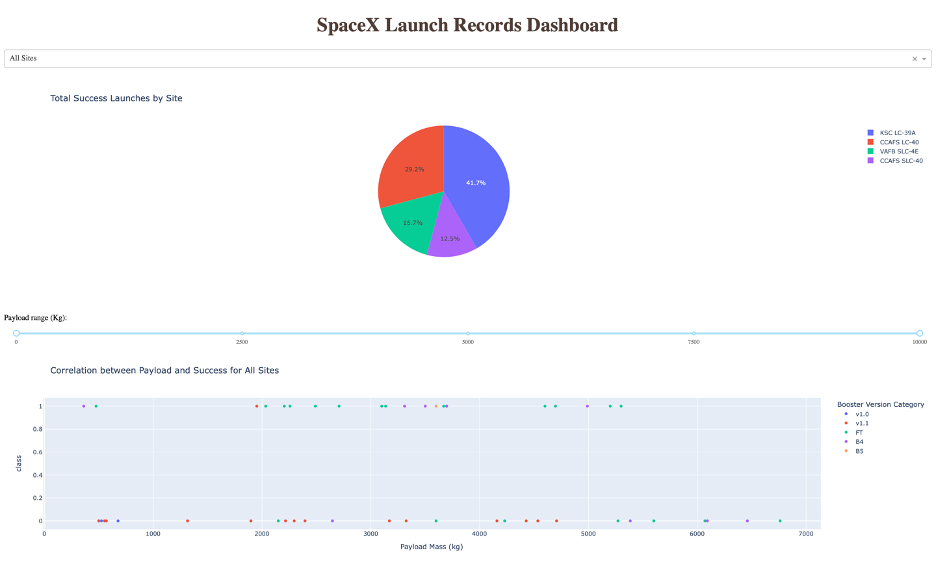

This is what the entire dashboard looks like for site CCAFS LC-40:
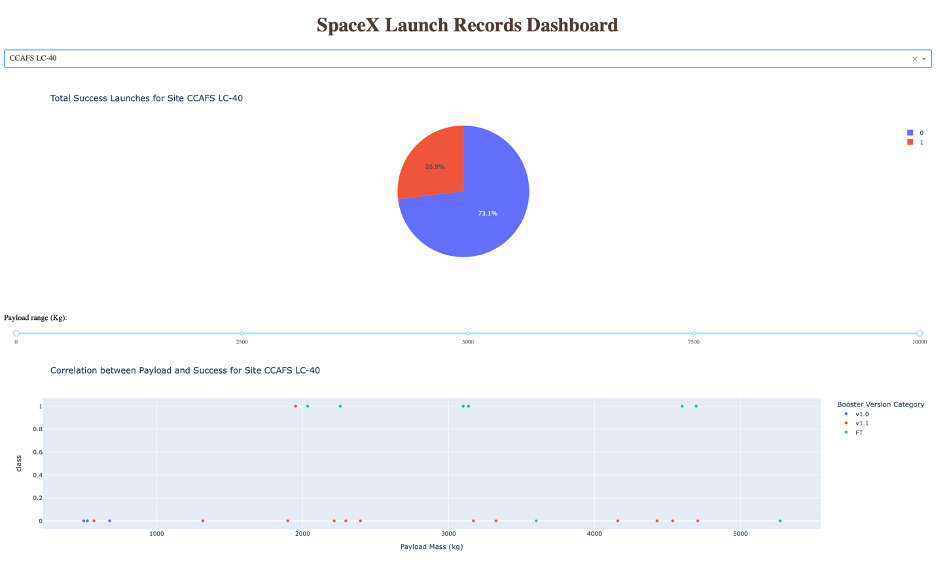

This is what the entire dashboard looks like for site VAFB SLC-4E:
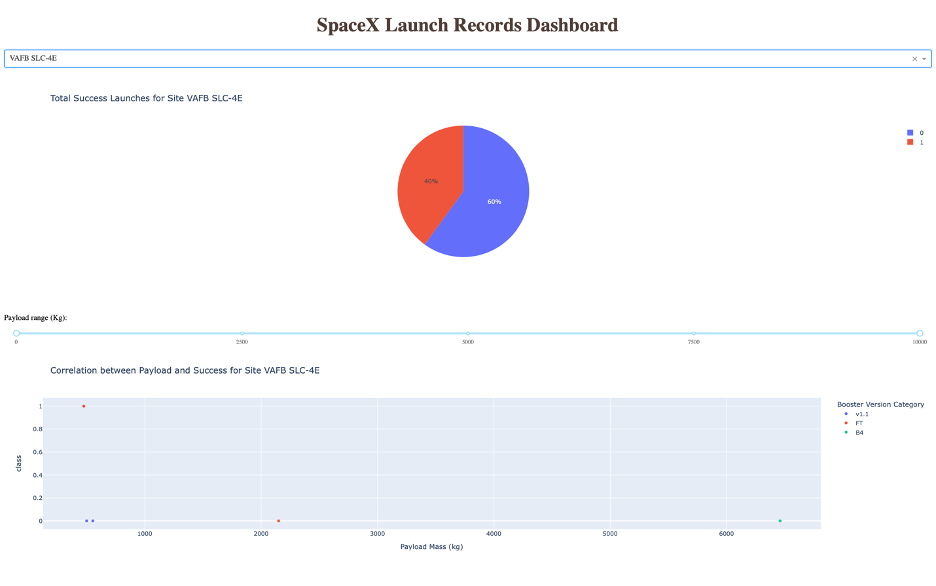

This is what the entire dashboard looks like for site KSC LC-39A:
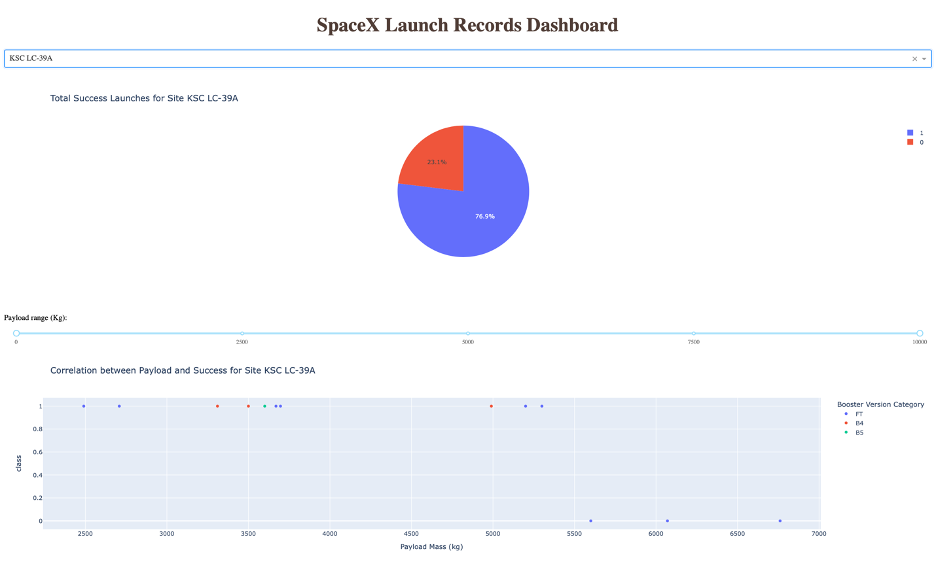

This is what the entire dashboard looks like for site CCAFS SLC-40:
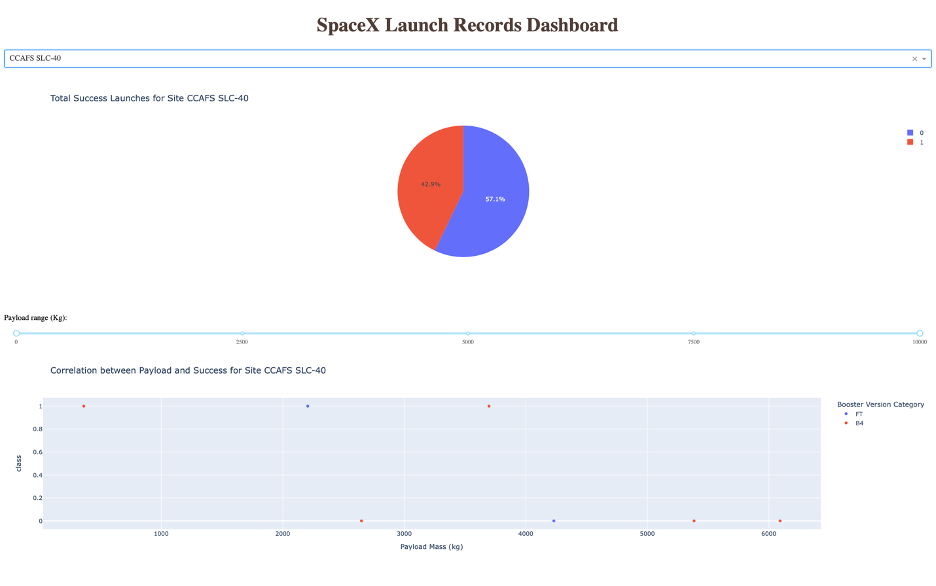